# Project 0: Inaugural Project

### Økonometrioen - nxj360, btq674 & vsj859
March 16th 2020

noget med hvilke programmer vi importerer

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import optimize

1) We define our utility function and solve the maximization problem.


To do this, we have chosen to make an outer function and an inner function. In our inner function, we define the utility function from the project description. In our outer function we maximize our inner function using a loop and return our maximized utility and the optimal level of labor supply and consumption.

In [40]:
# Our outer function solves our maximization problem
def f(w = 1, m = 1, ny = 10, tau_0 = 0.4, tau_1 = 0.1, kappa = 0.4, epsilon = 0.3):
    # Our utility function
    def u(l):
        c = m + w * l - (tau_0 * w * l + tau_1 * max(w * l - kappa, 0))
        if c > 0:
            u = math.log(c) - ny * (l ** (1 + 1 / epsilon) / (1 + 1 / epsilon))
            return u
        else:
            u = 0
            return u

    
# Here we maximize using a loop
    N = 500
    l_vec = np.linspace(0,1,N)
    
    u_best = 0 # initial maximum
    l_best = 0 # initial number

    for i, l in enumerate(l_vec):
        u_now = u(l)
        if u_now > u_best:
            l_best = l
            u_best = u_now
    
    # Determinies the optimal c
    c_best = m + w * l_best - (tau_0 * w * l_best + tau_1 * max(w * l_best - kappa, 0))
    
    return u_best, l_best, c_best

2) To plot labor supply and consumption as a function of the wage, we generate a linspace of wages, and run them through our function from 1). Then we plot our results.

In [41]:
w_vec = np.linspace(0.5, 1.5, 100)

l_value = []
c_value = []

for i, w in enumerate(w_vec):
    l_value.append(f(w)[1])
    c_value.append(f(w)[2])


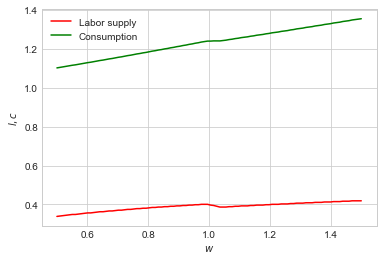

In [42]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(w_vec, l_value, c = 'r', label = 'Labor supply')
ax1.plot(w_vec, c_value, c = 'g', label = 'Consumption')
plt.legend(loc='upper left')
plt.style.use('seaborn-whitegrid')
ax1.set_xlabel('$w$')
ax1.set_ylabel('$l,c$')
plt.show()

3)
To generate a wage for each individual in the population, we use a linspace like in 2) but with N = 10.000

Then we use a loop to insert each value in our linspace into the function.

In [43]:
w_vec = np.linspace(0.5, 1.5, 10000)


def tax_revenue(tau_0 = 0.4, tau_1 = 0.1, kappa = 0.4):
    T = 0
    for i in w_vec:
        T += tau_0 * i * f(w = i, tau_0 = tau_0, tau_1 = tau_1, kappa = kappa)[1] + tau_1 * max(i * f(w = i, tau_0 = tau_0, tau_1 = tau_1, kappa = kappa)[1] - kappa, 0)
    return T

print(tax_revenue())

1630.1852031575927


4)
If epsilon = 0.1, we use the loop above to see that 

In [15]:
T = 0
for i in w_vec:
    tau_0 = 0.4
    tau_1 = 0.1
    kappa = 0.4
    T += tau_0 * i * f(i, epsilon = 0.1)[1] + tau_1 * max(i * f(i, epsilon = 0.1)[1] - kappa, 0)

print(T)

3196.8957098602746


5) To maximize the tax revenue, we make a couple of assumptions:
- $\tau_0$ and $\tau_1$ can only be between 0 and 1 - you cannot tax less than nothing and more than the entire income.
- $\kappa$ can only be bewteen 0 and 1.5 as the largest possible income is 1.5.

Originaly, we tried using a loop to optimize, but as the process took incredibly long to be somewhat precise, we have opted to use an optimizer. 

We have chosen the optimizer from the scipy package. After consultation from other groups, we have chosen the Powell method, in order to avoid problems occuring from what we asume to be differentation.

Bellow we have made a function, neg_tax_revenue, which uses a parametervector to insert parameters in the tax_revenue function and makes it negative. The reason we make it negative is so that we can use a minimizing optimizer to maximize.

In [47]:
def neg_tax_revenue(vector):
    tau_0 = vector[0]
    tau_1 = vector[1]
    kappa = vector[2]
    tax = -1* tax_revenue(tau_0 = tau_0, tau_1 = tau_1, kappa = kappa)
    if kappa < 0:
        return 0
    if kappa > 1.5:
        return 0
    if tau_0 < 0:
        return 0
    if tau_0 > 1:
        return 0
    if tau_1 < 0:
        return 0
    if tau_1 > 1:
        return 0
    else:
        return tax

Next step is to minize. To do this, we first give the minimizer an initial guess. We have chosen the given paramter values:

In [48]:
initial_guess = [0.4, 0.1, 0.4]

In [51]:
w_vec = np.linspace(0.5, 1.5, 100)
max_tax = optimize.minimize(neg_tax_revenue, initial_guess, method = 'Powell')

print(max_tax)

   direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: -24.680475483373293
 message: 'Optimization terminated successfully.'
    nfev: 234
     nit: 3
  status: 0
 success: True
       x: array([0.78696323, 0.00169945, 0.79667445])


Note: Above, we have chosen to reduce the amount of people in the economy to a hundred people. This sacrices accuracy, but we accepted that as the tradeoff of increased speed.